In [11]:
import pandas as pd
import matplotlib.pyplot as plt


In [54]:
df_prcp = pd.read_csv('USC00047821.csv', usecols=['DATE','PRCP'])
df_prcp.set_index('DATE', inplace=True)
df_enso = pd.read_csv('cpc.ncep.noaa.gov_data_indices_soi.3m.txt',delim_whitespace=True)
#df['Column1'] = df['Column1'].astype(float)
df_enso['MAY'] = df_enso['MAY'].astype(float)
#print(df_prcp.head())
print(df_enso.dtypes)
df_enso.head()

YEAR      int64
JAN     float64
FEB     float64
MAR     float64
APR     float64
MAY     float64
JUN     float64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
dtype: object


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1951,-999.9,0.8,0.2,-0.4,-0.3,-0.5,-0.3,-0.8,-0.8,-1.0,-0.8,-0.8
1,1952,-0.7,-0.3,-0.1,0.4,0.4,0.7,0.4,0.1,0.1,0.1,-0.3,-0.3
2,1953,-0.5,-0.1,-0.2,-0.6,-0.5,-0.5,-0.4,-0.8,-0.8,-0.5,-0.2,-0.0
3,1954,-0.0,0.2,0.2,0.5,0.4,0.3,0.5,0.6,0.5,0.2,0.6,0.3
4,1955,0.9,0.7,0.8,0.5,0.7,1.3,1.5,1.5,1.4,1.3,1.2,1.2


<AxesSubplot:xlabel='DATE'>

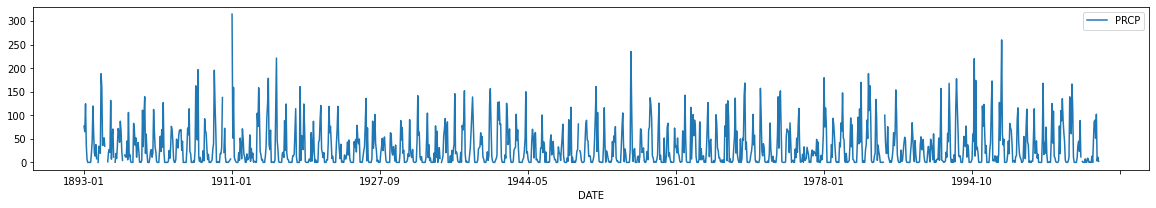

In [56]:
plt.rcParams["figure.figsize"] = (20,3)
df_prcp.plot(y='PRCP')

In [57]:
conv_dict = {'JAN':'01',
            'FEB':'02',
            'MAR':'03',
            'APR':'04',
            'MAY':'05',
            'JUN':'06',
            'JUL':'07',
            'AUG':'08',
            'SEP':'09',
            'OCT':'10',
            'NOV':'11',
            'DEC':'12'}
df_enso.rename(columns=conv_dict,inplace=True)

In [84]:
 

df_enso_melted = pd.melt(df_enso, id_vars='YEAR', var_name='Month', value_name='Index')
df_enso_melted.head()
# Combine 'index' and 'Month' columns to create yyyy-mm index
df_enso_melted['Date'] = df_enso_melted['YEAR'].astype(str) + '-' + df_enso_melted['Month']

# Set the newly created 'YearMonth' column as the index
df_enso_melted.set_index('Date', inplace=True)

# Drop the original 'index' and 'Month' columns
df_enso_melted.drop(columns=['YEAR', 'Month'], inplace=True)
df_enso_melted.sort_index(inplace=True)
df_enso_melted = df_enso_melted[~((df_enso_melted['Index'] == -999.9) | df['Index'].isna()  )]
#print(df_enso_melted.head(20))
#print(df_prcp.head(20)) 


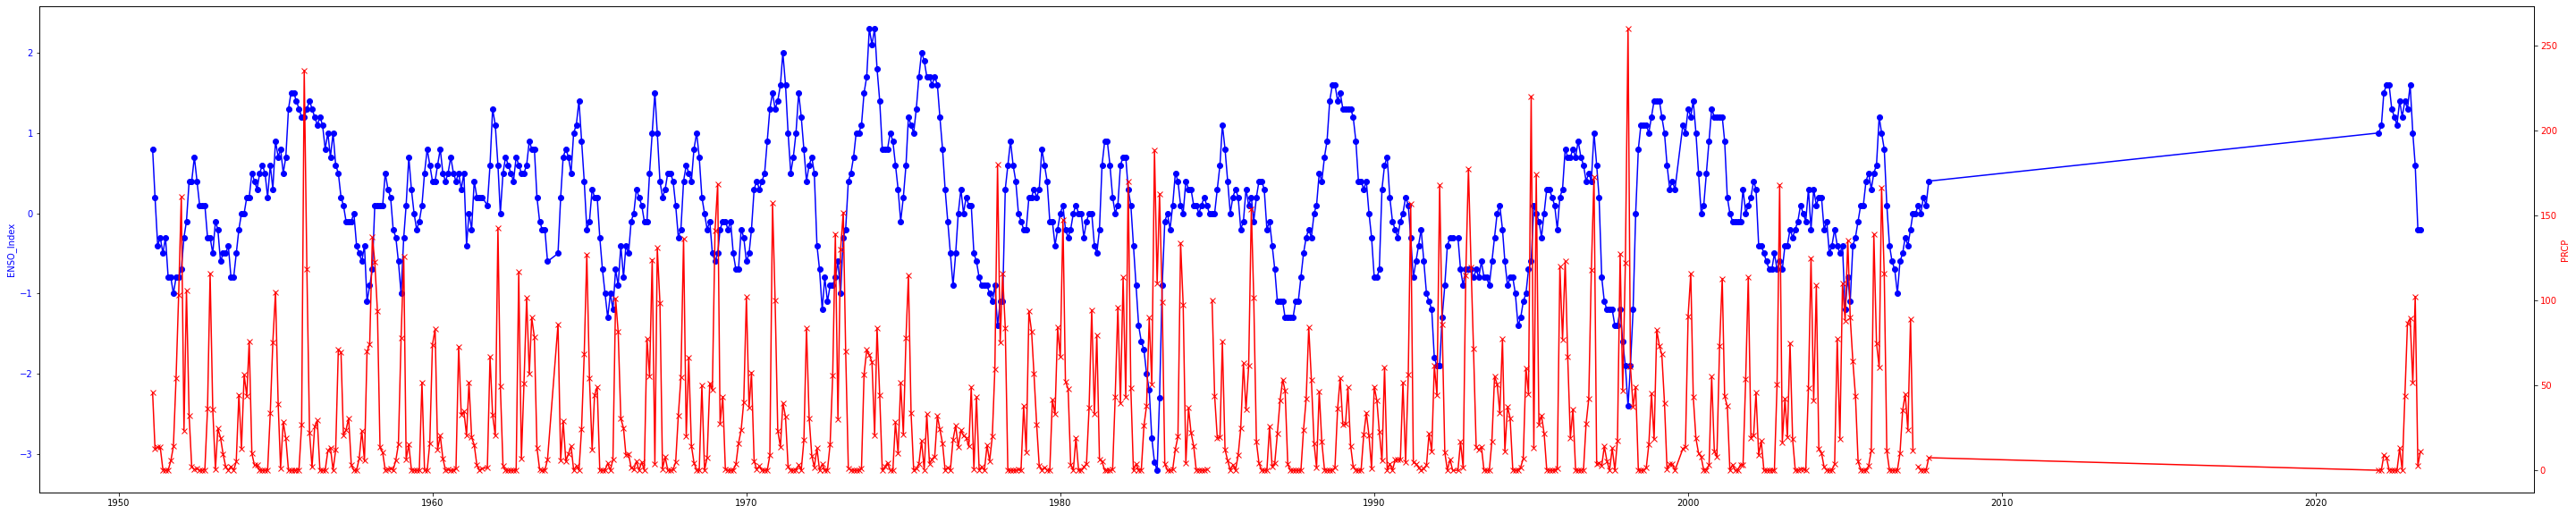

In [122]:
# Example DataFrame with a string column and a float column



df = df_enso_melted.merge(df_prcp, left_index=True, right_index=True)

regex_pattern = r'$[4-9]'  # Drop rows with index starting with 'A'
df = df[~df.index.str.match(regex_pattern)]


df['Index'] = df['Index'].astype(float)
df = df.rename_axis('Date')

dfp = df.reset_index()
dfp['Date'] =   pd.to_datetime(dfp['Date'], format='%Y-%m')

fig, ax1 = plt.subplots()

ax1.plot(dfp['Date'].to_numpy(),dfp['Index'].to_numpy(), color='blue', marker='o')
ax1.set_ylabel('ENSO_Index', color='blue')
ax1.tick_params(axis='y', labelcolor='blue') 

 

 
# Create a second y-axis on the same plot for the second column (Column2)
ax2 = ax1.twinx()
ax2.plot(dfp['Date'].to_numpy(), df['PRCP'].to_numpy(), color='red', marker='x')
ax2.set_ylabel('PRCP', color='red')
ax2.tick_params(axis='y', labelcolor='red')
 
# Add x-axis label and title
plt.rcParams["figure.figsize"] = (50,10)
plt.xlabel('Index')
plt.savefig('plot.png')
plt.show()
#print(df.head(20))  
dfp.set_index('Date')
dfp.to_csv('Date-ENSO_Index,PRCP.csv')
 

In [61]:
df = df[~((df['Index'] == -999.9) | df['Index'].isna() | df['PRCP'].isna())]
print(df.head(20))  

         Index   PRCP
1951-02    0.8   45.7
1951-03    0.2   12.7
1951-04   -0.4   13.5
1951-05   -0.3   13.5
1951-06   -0.5    0.3
1951-07   -0.3    0.0
1951-08   -0.8    0.0
1951-09   -0.8    5.6
1951-10   -1.0   14.0
1951-11   -0.8   54.4
1951-12   -0.8  103.1
1952-01   -0.7  161.0
1952-02   -0.3   23.4
1952-03   -0.1  105.8
1952-04    0.4   32.1
1952-05    0.4    2.1
1952-06    0.7    0.5
1952-07    0.4    1.0
1952-08    0.1    0.0
1952-09    0.1    0.0


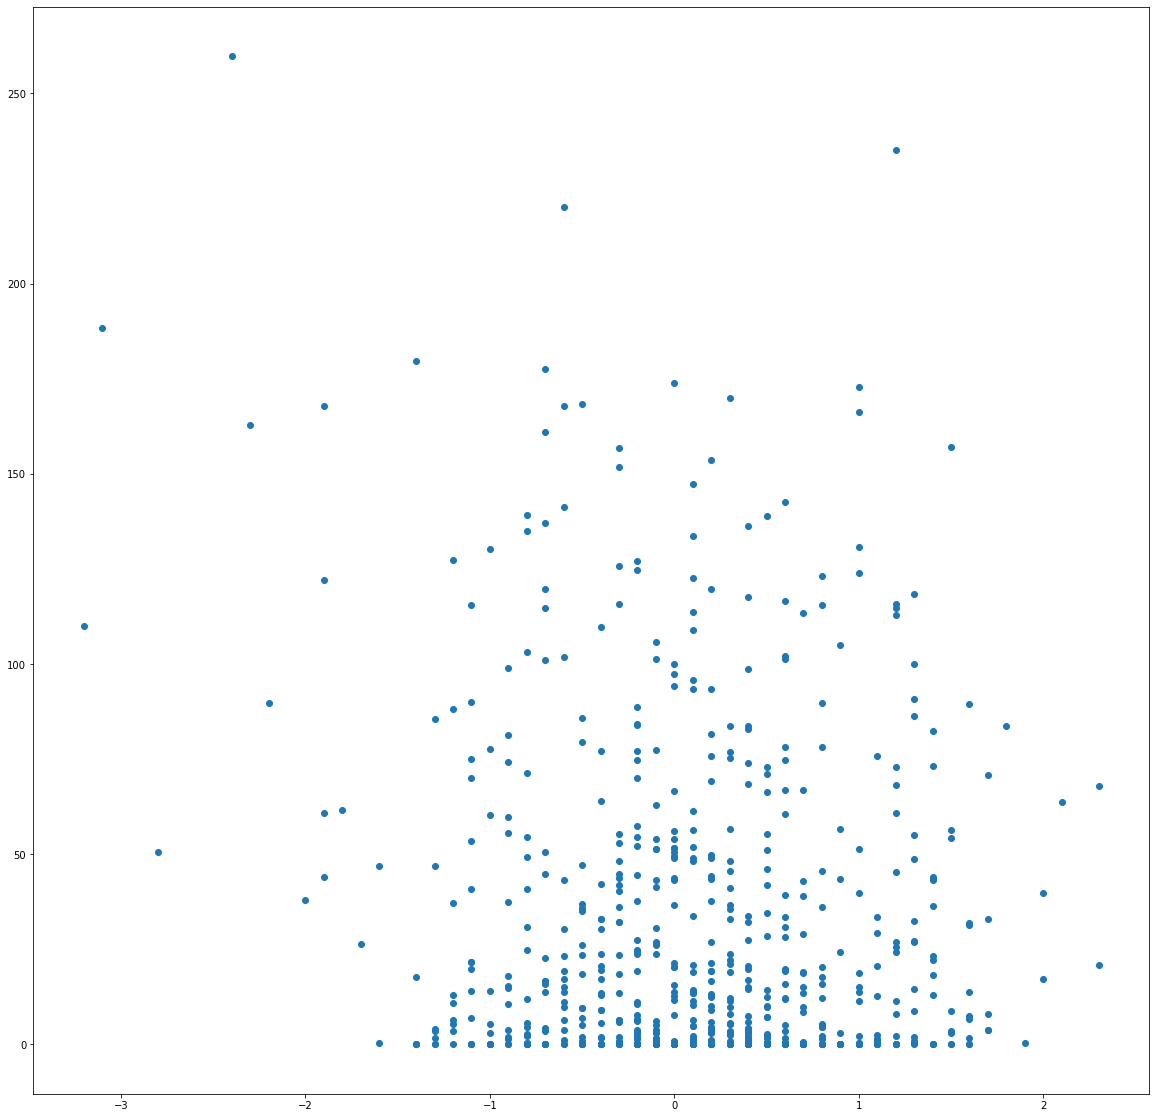

In [64]:
plt.rcParams["figure.figsize"] = (20,20)
plt.scatter(df['Index'],df['PRCP'])

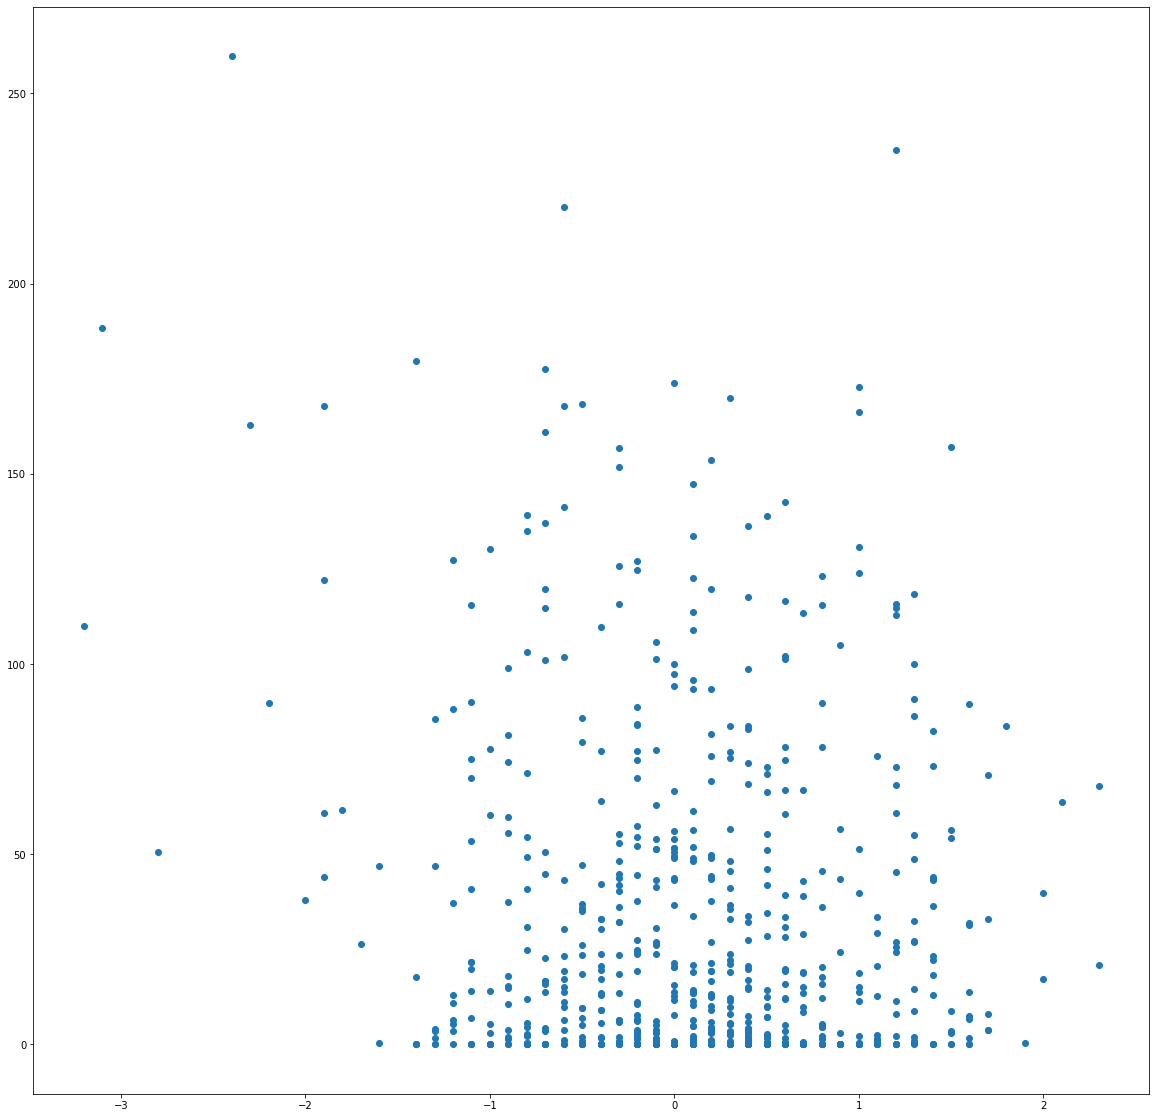

In [65]:
# Drop rows based on index selected through regex
regex_pattern = r'$[4-9]'  # Drop rows with index starting with 'A'

df_f = df[~df.index.str.match(regex_pattern)]
plt.scatter(df_f['Index'],df_f['PRCP'])

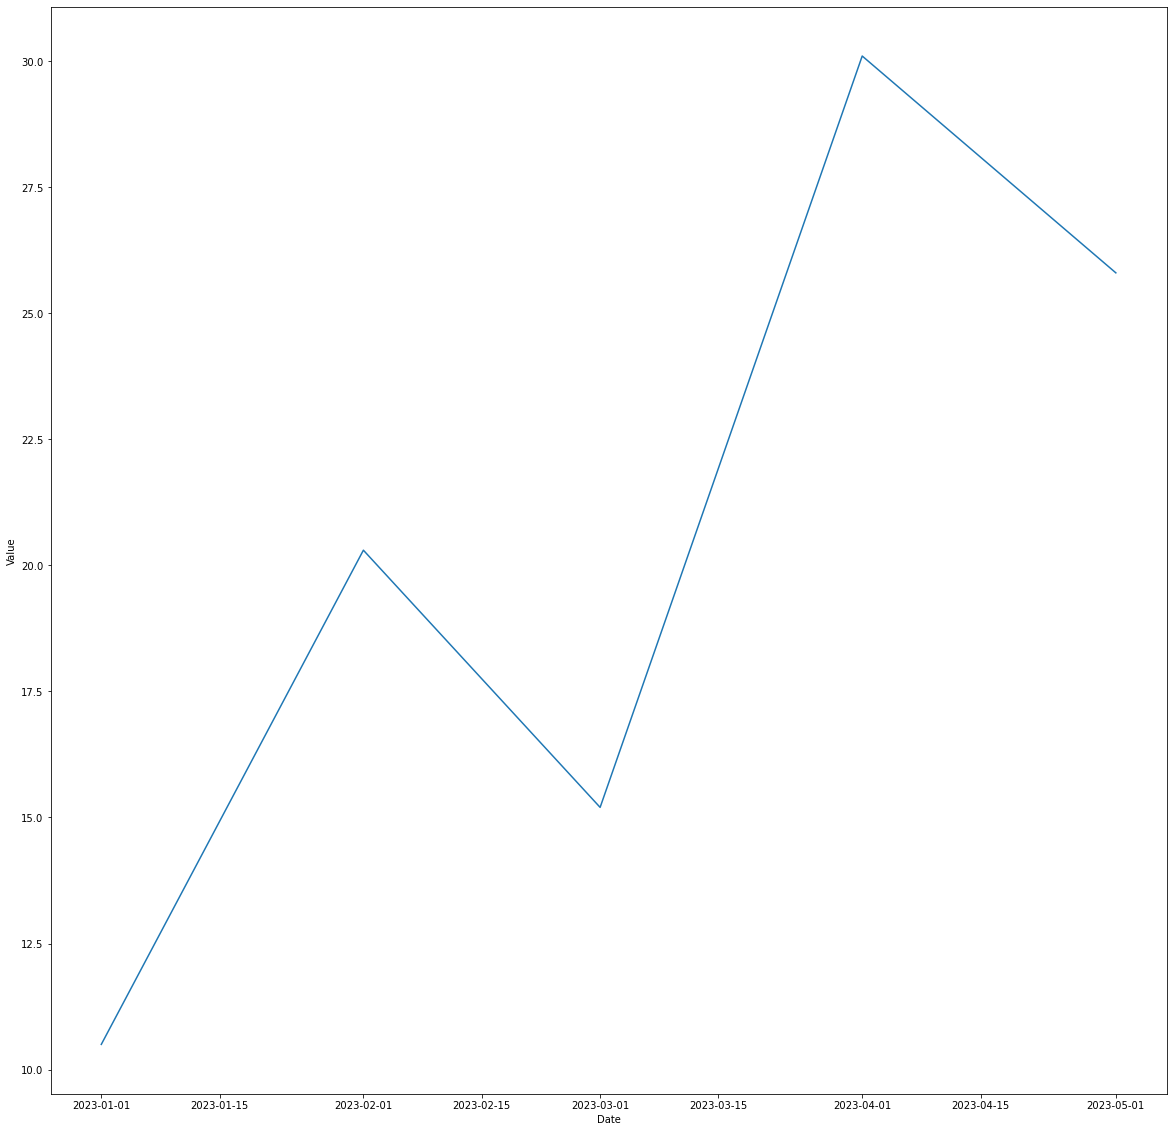

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with a float64 column and a date column in "YYYY-MM" format
data = {
    'Date': ['2023-01', '2023-02', '2023-03', '2023-04', '2023-05'],
    'Value': [10.5, 20.3, 15.2, 30.1, 25.8]
}

df = pd.DataFrame(data)

# Convert the 'Date' column to a datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

# Create a line plot
plt.plot(df['Date'].to_numpy(), df['Value'].to_numpy())

# Set x-axis and y-axis labels
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()